In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

warnings.filterwarnings('ignore')

housing = pd.read_csv(r'C:\Users\Connor\Documents\IntroToMLHW\HW2\Housing.csv')

varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1,"no":0})
         

housing[varlist] = housing[varlist].apply(binary_map)
         
random = np.random.seed(45)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = random)
m = len(df_train)
n = len(df_test)

housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [155]:
def computeCost(x, y, theta, lam, size):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    J = 1/(2 * size) * (np.sum(sqrErrors) + lam * np.sum(sqrTheta))
    
    return J

In [156]:
def gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam):
    cost_history = np.zeros(iterations)
    validationCost = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta = theta * (1 - alpha * (lam / m)) - sum_delta;
        cost_history[i] = computeCost(x, y, theta, lam, m)
        validationCost[i] = computeCost(valX, valY, theta, 0, n)
        
    return theta, cost_history, validationCost
    

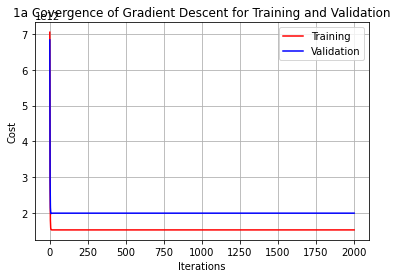

In [169]:
# Training for Problem 1a


varlist = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

housing1aTrain = df_train[varlist]
housing1aTest = df_test[varlist]


theta = np.zeros(len(varlist))

y = housing1aTrain.pop('price')
x = housing1aTrain

iterations = 2000
alpha = 0.00000001

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

lam = 0

valY = housing1aTest.pop('price')
valX = housing1aTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)


iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('1a Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()


Final value of theta = [6.16711299e+00 8.63374188e+02 2.35250594e+01 1.37783897e+01
 2.08994825e+01 5.56127375e+00 2.71061474e+00 4.63549801e+00
 5.74317280e-01 7.30006047e+00 5.05002594e+00 3.57358005e+00]
cost_history = [7.04420350e+12 4.11237149e+12 2.74042706e+12 ... 1.53371528e+12
 1.53371525e+12 1.53371521e+12]
validation loss = [6.82873774e+12 4.15815081e+12 2.94063369e+12 ... 2.00066189e+12
 2.00066184e+12 2.00066179e+12]


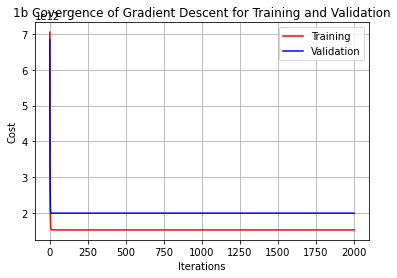

In [171]:
#Training for Problem 1b

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing1bTrain = df_train[varlist]
housing1bTest = df_test[varlist]

iterations = 2000
alpha = 0.00000001

theta = np.zeros(len(varlist))

y = housing1bTrain.pop('price')
x = housing1bTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

lam = 0

valY = housing1bTest.pop('price')
valX = housing1bTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('1b Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

Final value of theta = [0.07936862 0.22928592 0.10143028 0.21019838 0.14522526 0.14190411]
cost_history = [0.04732496 0.0463236  0.04534917 ... 0.00632883 0.00632853 0.00632824]
validation loss = [0.06049028 0.05930455 0.05814943 ... 0.00885243 0.00885228 0.00885212]

Final value of theta = [-1.12834793e-16  3.92536979e-01  6.97405136e-02  3.25044769e-01
  2.17336284e-01  1.65854496e-01]
cost_history = [0.48929419 0.47899469 0.46908589 ... 0.20884164 0.20884164 0.20884164]
validation loss = [0.49039437 0.48115797 0.4722765  ... 0.24646845 0.24646845 0.24646845]


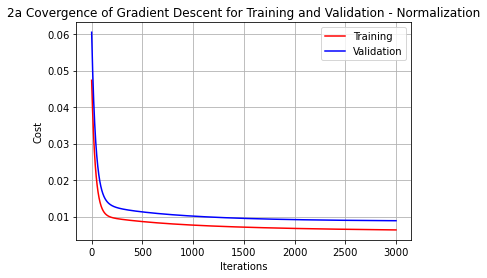

In [176]:
#Training for Problem 2a

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

housing2aTrain = df_train[varlist]
housing2aTest = df_test[varlist]

iterations = 3000
alpha = 0.01
lam = 0

# With normalization

scaler = MinMaxScaler()
housing2aTrain[varlist] = scaler.fit_transform(housing2aTrain[varlist] ) 
housing2aTest[varlist] = scaler.fit_transform(housing2aTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing2aTrain.pop('price')
x = housing2aTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing2aTest.pop('price')
valX = housing2aTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)
print('')


iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('2a Covergence of Gradient Descent for Training and Validation - Normalization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

# With standardization

housing2aTrain = df_train[varlist]
housing2aTest = df_test[varlist]

scaler = StandardScaler()
housing2aTrain[varlist] = scaler.fit_transform(housing2aTrain[varlist] ) 
housing2aTest[varlist] = scaler.fit_transform(housing2aTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing2aTrain.pop('price')
x = housing2aTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing2aTest.pop('price')
valX = housing2aTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)


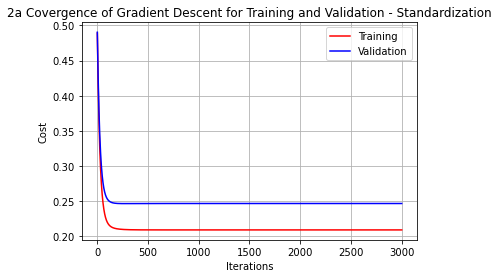

In [177]:
#Standardization plot

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('2a Covergence of Gradient Descent for Training and Validation - Standardization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

Final value of theta = [0.00114484 0.35031127 0.04787502 0.29160516 0.10024633 0.02899875
 0.01001074 0.03987139 0.03801119 0.08541834 0.08148812 0.05682157]
cost_history = [0.03058477 0.02070556 0.01519795 ... 0.00413222 0.00413222 0.00413222]
validation loss = [0.04147823 0.029703   0.02274704 ... 0.00776357 0.00776358 0.00776359]

Final value of theta = [-1.02105551e-16  3.12309466e-01  4.21595173e-02  2.95804149e-01
  1.76394658e-01  5.87504577e-02  2.34345919e-02  1.15877522e-01
  5.25554407e-02  2.41902223e-01  1.40146034e-01  1.50687272e-01]
cost_history = [0.35880765 0.2766476  0.2286036  ... 0.1517434  0.1517434  0.1517434 ]
validation loss = [0.37134659 0.29685147 0.25364766 ... 0.20084719 0.20084719 0.20084719]


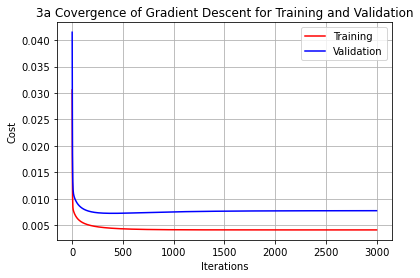

In [174]:
#Training for Problem 2b

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing2bTrain = df_train[varlist]
housing2bTest = df_test[varlist]

iterations = 3000
alpha = 0.1
lam = 0


# With normalization

scaler = MinMaxScaler()
housing2bTrain[varlist] = scaler.fit_transform(housing2bTrain[varlist]) 
housing2bTest[varlist] = scaler.fit_transform(housing2bTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing2bTrain.pop('price')
x = housing2bTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing2bTest.pop('price')
valX = housing2bTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)
print('')


iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('3a Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

# With standardization

housing2bTrain = df_train[varlist]
housing2bTest = df_test[varlist]

scaler = StandardScaler()
housing2bTrain[varlist] = scaler.fit_transform(housing2bTrain[varlist]) 
housing2bTest[varlist] = scaler.fit_transform(housing2bTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing2bTrain.pop('price')
x = housing2bTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing2bTest.pop('price')
valX = housing2bTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)



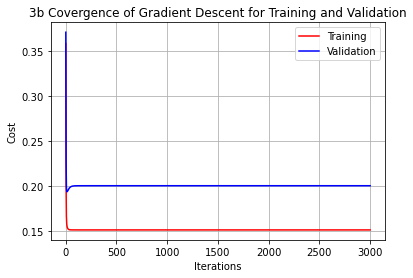

In [162]:
#Standardization plot

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('3b Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

Final value of theta = [0.04151128 0.43612468 0.07850445 0.31815384 0.1239524  0.09728074]
cost_history = [0.03869503 0.03147363 0.02607174 ... 0.00573016 0.00573016 0.00573016]
validation loss = [0.05022495 0.041527   0.03492339 ... 0.00900557 0.00900557 0.00900557]


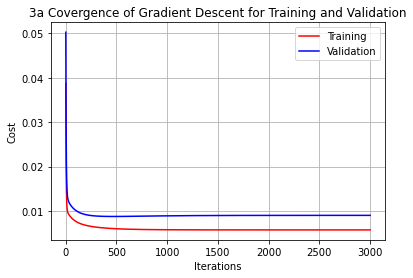

In [163]:
#Training for Problem 3a


varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

housing3aTrain = df_train[varlist]
housing3aTest = df_test[varlist]

iterations = 3000
alpha = 0.1
lam = 0.1

scaler = MinMaxScaler()
housing3aTrain[varlist] = scaler.fit_transform(housing3aTrain[varlist] ) 
housing3aTest[varlist] = scaler.fit_transform(housing3aTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing3aTrain.pop('price')
x = housing3aTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing3aTest.pop('price')
valX = housing3aTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('3a Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()

Final value of theta = [0.00158095 0.34577322 0.04860235 0.28921151 0.10035476 0.02939344
 0.01027187 0.03986371 0.03793671 0.08552837 0.08211591 0.05693657]
cost_history = [0.03058504 0.02070667 0.01519992 ... 0.00416378 0.00416378 0.00416378]
validation loss = [0.04147823 0.02970336 0.02274776 ... 0.00773928 0.00773929 0.0077393 ]


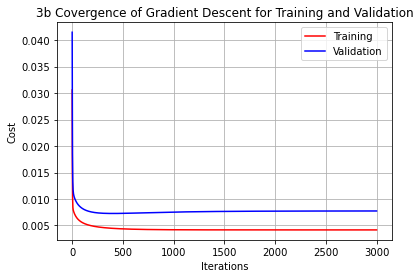

In [178]:
#Training for Problem 3b


varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

housing3bTrain = df_train[varlist]
housing3bTest = df_test[varlist]

iterations = 3000
alpha = 0.1
lam = 0.1

scaler = MinMaxScaler()
housing3bTrain[varlist] = scaler.fit_transform(housing3bTrain[varlist] ) 
housing3bTest[varlist] = scaler.fit_transform(housing3bTest[varlist]) 

theta = np.zeros(len(varlist))

y = housing3bTrain.pop('price')
x = housing3bTrain

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

valY = housing3bTest.pop('price')
valX = housing3bTest

x0 = np.ones((n, 1))
valX = np.hstack((x0, valX))

theta, cost_history, validationCost = gradientDescent(x, y, valX, valY, theta, alpha, iterations, lam)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validationCost)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validationCost, color= 'blue', label = 'Validation')
plt.title('3b Covergence of Gradient Descent for Training and Validation')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.grid()